# 1. 价值选股

低PE/PB/PS/PCF

本杰明·格雷厄姆的选股标准：(如果一家公司符合以下10条中的7条，可以考虑购买）

1.该公司每股盈利与股价之比（市盈率的倒数）是一般AAA公司债券收益率的 2 倍。

2.这家公司目前的市盈率应该是过去 5 年中最高市盈率的 2/5。

3.这家公司的股息收益率应该是 AAA 级公司债券收益率的 2/3。

4.这家公司的股价应该低于每股有形资产账面价值的 2/3。

5.这家公司的股价应该低于净流动资产或是净速动资产清算价值的 2/3。

6.这家公司的总负债应该低于有形资产价值。

7.这家公司的流动比率应该在 2 以上。

8.这家公司的总负债不超过净速动清算价值。

9.这家公司的获利在过去 10 年来增加了 1 倍。

10.这家公司的获利在过去 10 年中的 2 年减少不超过 5%。

## Step1 获取沪深300成分股代号

In [1]:
from fxdayu_data import DataAPI
from datetime import datetime
import tushare as ts
import numpy as np
# from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd

# def coder(code):
#     if code.startswith('6'):
#         return code + '.XSHG'
#     elif code.startswith('0') or code.startswith('3'):
#         return code + '.XSHE'
#     else:
#         return code


# name = ts.get_hs300s()
# name_list = list(name.code)
# codes = tuple(map(coder, name_list))
# print(codes)

## Step2 获取Panel与几个的DataFrame

In [44]:
factor = DataAPI.factor('HS300', ('ROE', 'PB', 'NetAssetGrowRate'), start=datetime(2014, 1, 1), end=datetime(2017, 1, 1))
candle = DataAPI.candle('HS300', 'D', start=datetime(2014, 1, 1), end=datetime(2017, 1, 1))

In [45]:
prices = candle.minor_xs('close')
roe = factor.minor_xs('ROE')
pb = factor.minor_xs('PB')
nagr = factor.minor_xs('NetAssetGrowRate')

In [46]:
s = (roe / pb) + nagr * 0.5

In [47]:
s_factor = s.stack()

In [48]:
import alphalens

factor_data = alphalens.utils.get_clean_factor_and_forward_returns(s_factor, prices, quantiles=5, periods=(1, 5, 10))

cond = factor_data['factor_quantile'] == 5
save = factor_data[cond]
s = pd.Series(True, index=save.index)
s = s.unstack()
s[s != True] = False
# s.to_excel('C:/Users/small/Desktop/july_first/Value_Selection.xlsx')
print(s)

asset               000001.XSHE 000002.XSHE 000008.XSHE 000063.XSHE  \
date                                                                  
2014-01-02 15:00:00       False        True        True       False   
2014-01-03 15:00:00       False        True        True       False   
2014-01-06 15:00:00       False        True        True       False   
2014-01-07 15:00:00       False        True        True       False   
2014-01-08 15:00:00       False        True        True       False   
2014-01-09 15:00:00       False        True        True       False   
2014-01-10 15:00:00       False        True        True       False   
2014-01-13 15:00:00       False        True        True       False   
2014-01-14 15:00:00       False        True        True       False   
2014-01-15 15:00:00       False        True        True       False   
2014-01-16 15:00:00       False        True        True       False   
2014-01-17 15:00:00       False        True        True       False   
2014-0

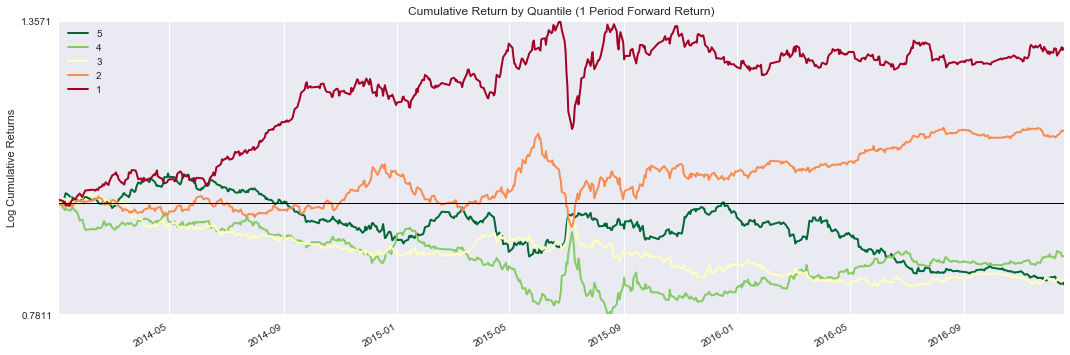

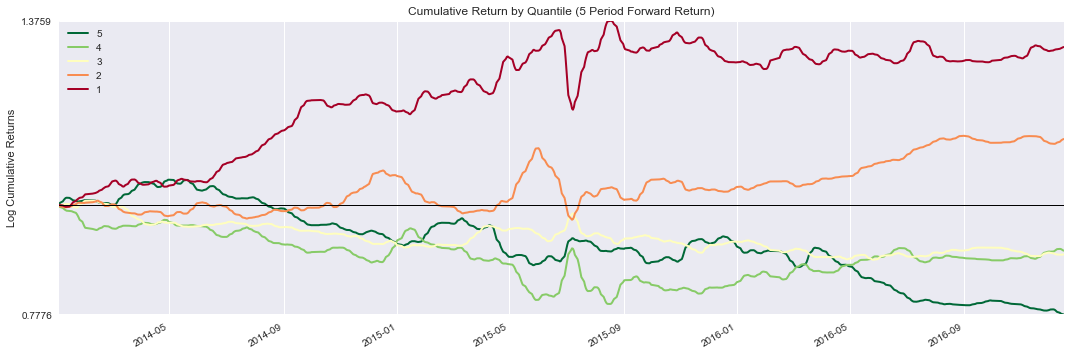

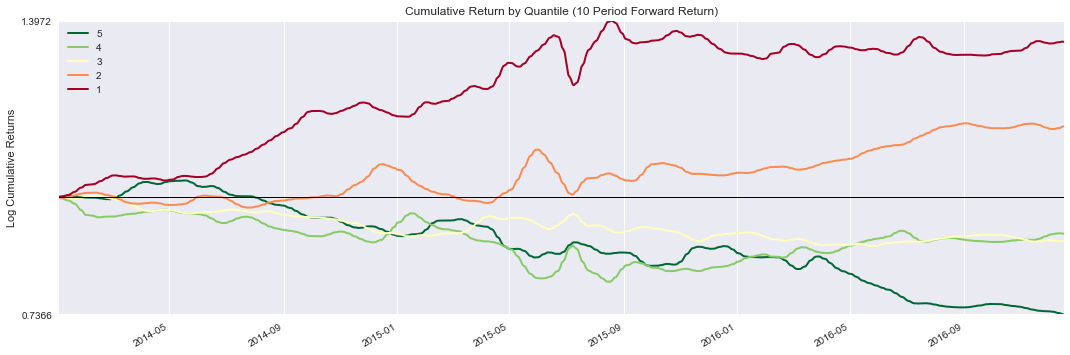

In [49]:
mean_return_by_q, std_err_by_q = alphalens.performance.mean_return_by_quantile(factor_data, by_date=True)
# print(mean_return_by_q).head()
# print(std_err_by_q).head()

alphalens.plotting.plot_cumulative_returns_by_quantile(mean_return_by_q, 1)
alphalens.plotting.plot_cumulative_returns_by_quantile(mean_return_by_q, 5)
alphalens.plotting.plot_cumulative_returns_by_quantile(mean_return_by_q, 10)
plt.show()

In [50]:
ic = alphalens.performance.factor_information_coefficient(factor_data)

                  1         5         10
date                                    
2014-01-31 -0.026792 -0.059981 -0.106056
2014-02-28 -0.026499 -0.042353  0.020230
2014-03-31  0.043928  0.108090  0.108375
2014-04-30  0.015934  0.016410  0.022030
2014-05-31  0.019733  0.026327  0.044104
2014-06-30  0.001086 -0.035215 -0.077400
2014-07-31  0.028247 -0.005072 -0.059984
2014-08-31 -0.043979 -0.093334 -0.120160
2014-09-30 -0.043435 -0.094863 -0.111088
2014-10-31  0.004253  0.001459 -0.027149
2014-11-30 -0.020086 -0.032642 -0.028319
2014-12-31  0.015827  0.002573  0.012104
2015-01-31  0.003736 -0.003025 -0.016158
2015-02-28  0.008640 -0.013086 -0.036639
2015-03-31  0.003140  0.000314 -0.025752
2015-04-30 -0.045433 -0.054581 -0.098709
2015-05-31 -0.006293 -0.066796 -0.108405
2015-06-30  0.041282  0.108817  0.158829
2015-07-31  0.001919 -0.079603 -0.163356
2015-08-31 -0.033007 -0.011720  0.041265
2015-09-30 -0.008952 -0.025398 -0.057956
2015-10-31  0.000198  0.040816  0.073580
2015-11-30  0.01

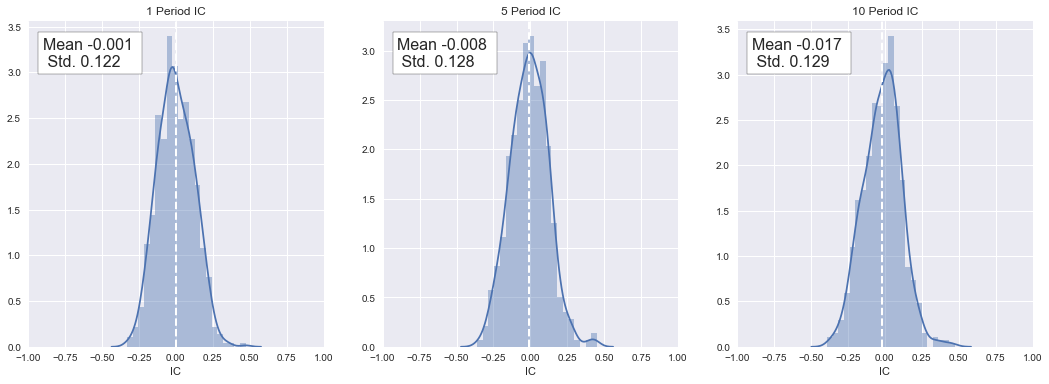

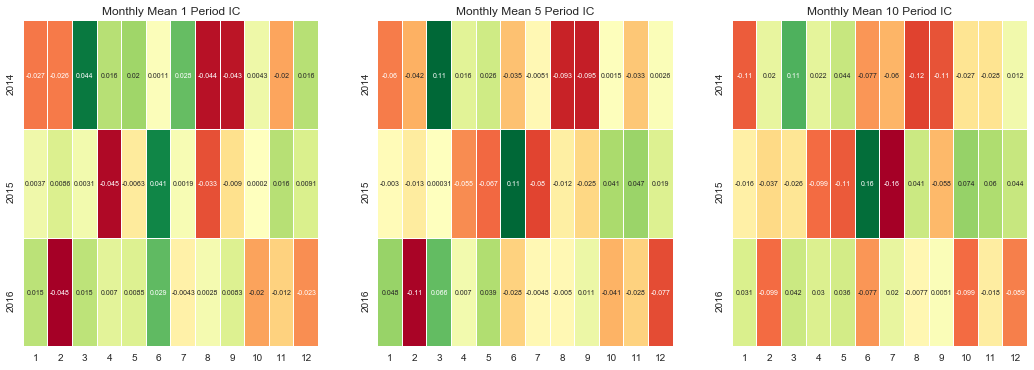

In [51]:
alphalens.plotting.plot_ic_hist(ic)
mean_monthly_ic = alphalens.performance.mean_information_coefficient(factor_data, by_time='M')
print mean_monthly_ic
alphalens.plotting.plot_monthly_ic_heatmap(mean_monthly_ic)
plt.show()

## Step3 对数据进行标准化处理

In [5]:
def winsorize(df):
    q = df.quantile([0.025, 0.975])
    if isinstance(q, pd.Series) and len(q) == 2:
        df[df < q.iloc[0]] = q.iloc[0]
        df[df > q.iloc[1]] = q.iloc[1]
    return df

def standardize(df):
    df_std = df.std()
    df_mean = df.mean()
    return (df - df_mean) / df_std

S_PE = standardize(winsorize(PN.minor_xs('PE')))
S_PB = standardize(winsorize(PN.minor_xs('PB')))
S_PS = standardize(winsorize(PN.minor_xs('PS')))
S_PCF = standardize(winsorize(PN.minor_xs('PCF')))
fig = plt.figure(figsize=(15, 7))
plt.plot(S_PB)
plt.show()

ValueError: need at least one array to concatenate

## Step4 输入因子算法，输出因子的Pipeline格式

In [5]:
S = -(S_PE+2*S_PB+2*S_PS+0.5*S_PCF)
factor = S.stack()

print(factor)

datetime                        
2013-01-04 15:00:00  000001.XSHE     0.811598
                     000002.XSHE    -1.787618
                     000008.XSHE    -7.294753
                     000009.XSHE     4.239800
                     000027.XSHE     3.517933
                     000039.XSHE     3.708381
                     000060.XSHE     1.728151
                     000061.XSHE     4.028867
                     000063.XSHE     7.975591
                     000069.XSHE   -13.242184
                     000100.XSHE     0.851304
                     000156.XSHE     3.175610
                     000157.XSHE    -5.271736
                     000338.XSHE   -10.158154
                     000402.XSHE    -3.113505
                     000413.XSHE    -0.032468
                     000415.XSHE    -1.489766
                     000423.XSHE    -7.724833
                     000425.XSHE     0.394259
                     000503.XSHE     6.738091
                     000538.XSHE    -0.977481
 

## Step5 用Alphalens输出Quantile为5的股票列表

In [3]:
import alphalens

factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor, prices, quantiles=5)
cond = factor_data['factor_quantile'] == 5
save = factor_data[cond]
s = pd.Series(True, index=save.index)
s = s.unstack()
s[s != True] = False
# s.to_excel('C:/Users/small/Desktop/july_first/Value_Selection.xlsx')
print(s)

/Users/calvinku/anaconda/envs/fxdayu/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


NameError: name 'factor' is not defined

## Step6 显示Quantile收益与因子IC值

D:\ProgramData\Anaconda2\lib\site-packages\alphalens\plotting.py:767: FutureWarning: pd.rolling_apply is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,min_periods=1,window=5).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  min_periods=1, args=(period,))
D:\ProgramData\Anaconda2\lib\site-packages\alphalens\plotting.py:767: FutureWarning: pd.rolling_apply is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,min_periods=1,window=10).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  min_periods=1, args=(period,))


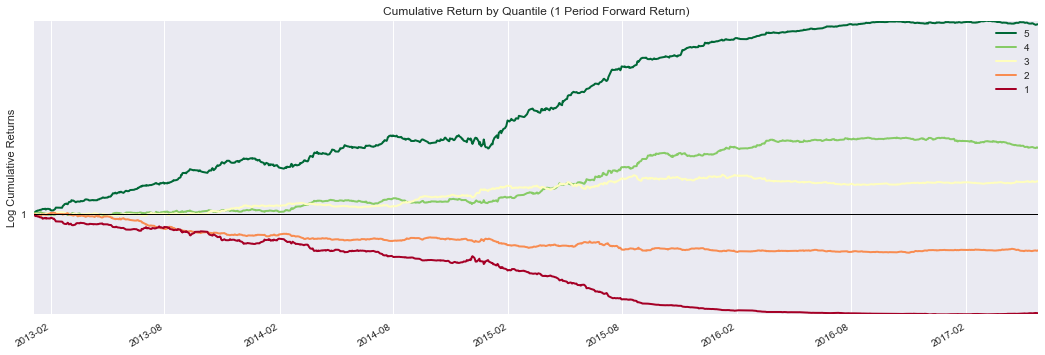

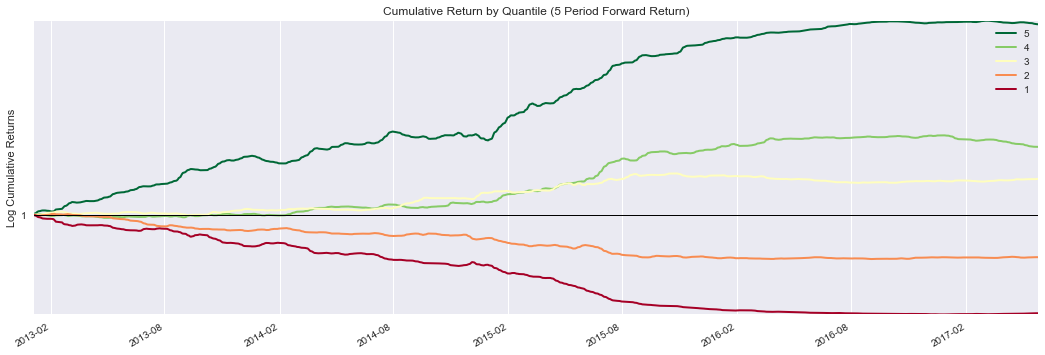

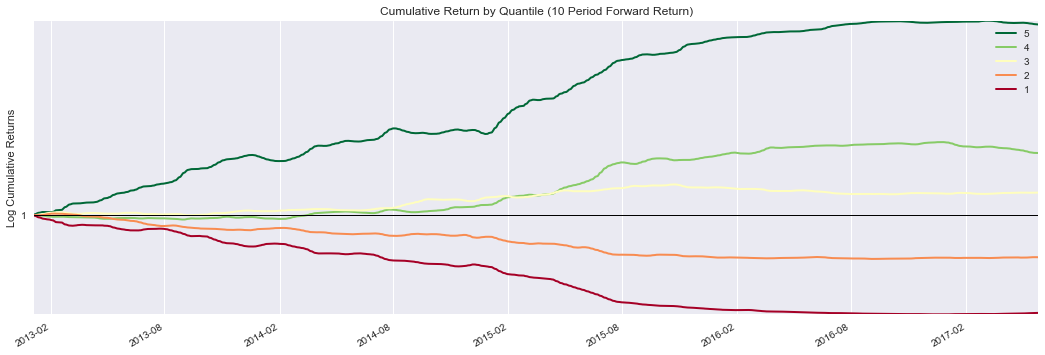

In [7]:
mean_return_by_q, std_err_by_q = alphalens.performance.mean_return_by_quantile(factor_data, by_date=True)
# print(mean_return_by_q).head()
# print(std_err_by_q).head()

alphalens.plotting.plot_cumulative_returns_by_quantile(mean_return_by_q, 1)
alphalens.plotting.plot_cumulative_returns_by_quantile(mean_return_by_q, 5)
alphalens.plotting.plot_cumulative_returns_by_quantile(mean_return_by_q, 10)
plt.show()

                  1         5         10
date                                    
2013-01-31  0.039407  0.043963  0.089886
2013-02-28  0.097427  0.231632  0.264346
2013-03-31  0.029124  0.003710  0.010848
2013-04-30  0.012614  0.029090  0.108843
2013-05-31  0.088444  0.164027  0.184383
2013-06-30  0.024834  0.034212  0.025115
2013-07-31  0.018179  0.022459  0.042642
2013-08-31  0.086225  0.165798  0.257991
2013-09-30  0.028551  0.088517  0.120227
2013-10-31  0.095307  0.184438  0.253471
2013-11-30  0.025996  0.063744  0.102805
2013-12-31  0.013999 -0.040776 -0.092962
2014-01-31 -0.031221 -0.033986  0.008671
2014-02-28  0.100258  0.200988  0.285051
2014-03-31  0.112162  0.257654  0.311149
2014-04-30  0.008232  0.046590  0.097888
2014-05-31  0.054601  0.069073  0.045246
2014-06-30  0.018130  0.052481  0.134638
2014-07-31  0.129588  0.256405  0.284347
2014-08-31  0.000658 -0.043592 -0.060853
2014-09-30  0.061759  0.106758  0.151765
2014-10-31  0.076966  0.118441  0.183938
2014-11-30  0.02

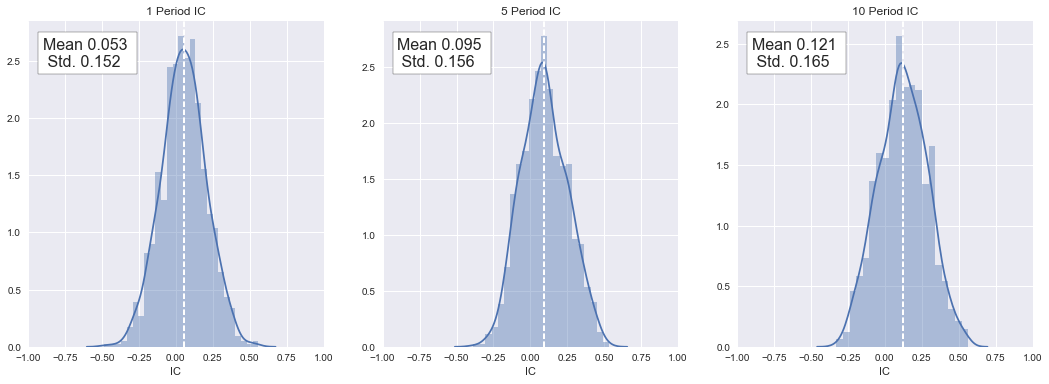

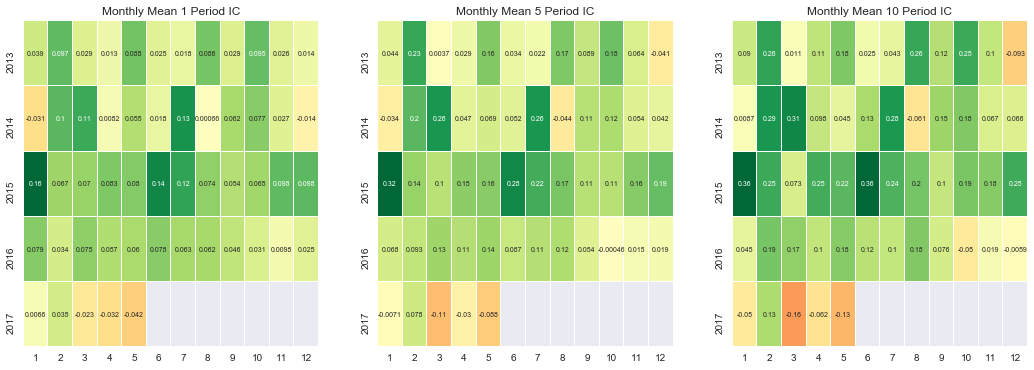

In [8]:
ic = alphalens.performance.factor_information_coefficient(factor_data)
# print ic
alphalens.plotting.plot_ic_hist(ic)
mean_monthly_ic = alphalens.performance.mean_information_coefficient(factor_data, by_time='M')
print mean_monthly_ic
alphalens.plotting.plot_monthly_ic_heatmap(mean_monthly_ic)
plt.show()